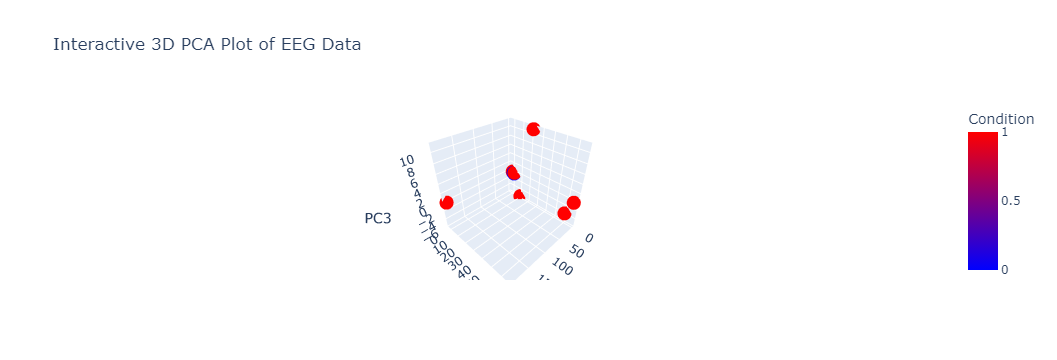

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Step 1: Load the CSV files
# Replace 'path_to_file' with the actual paths to your CSV files
base_009 = pd.read_csv(r'C:\Users\User\PycharmProjects\pythonProjectforOren\009_base_features.csv')
surgery_009 = pd.read_csv(r'C:\Users\User\PycharmProjects\pythonProjectforOren\009_surgery_features.csv')
base_015 = pd.read_csv(r'C:\Users\User\PycharmProjects\pythonProjectforOren\015_base_features.csv')
surgery_015 = pd.read_csv(r'C:\Users\User\PycharmProjects\pythonProjectforOren\015_surgery_features.csv')
base_033 = pd.read_csv(r'C:\Users\User\PycharmProjects\pythonProjectforOren\033_base_features.csv')
surgery_033 = pd.read_csv(r'C:\Users\User\PycharmProjects\pythonProjectforOren\033_surgery_features.csv')

# Step 2: Combine all data into one DataFrame
combined_data = pd.concat([base_009, surgery_009, base_015, surgery_015, base_033, surgery_033])

# Step 3: Separate features and label
# remove the 'label' column from combined_data and stores the remaining columns in the features variable.
features = combined_data.drop('label', axis=1)
#labels is the column that contains the target variable or the outcome we want to predict or analyze.
labels = combined_data['label']

# Step 4: Standardize the features
# calculate the mean and standard deviation for each feature in the dataset.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Perform PCA to reduce dimensions to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_scaled)

# Step 6: Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Ensure indices align correctly before assigning labels
pca_df.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)
pca_df['Label'] = labels

# Step 7: Plotting using plotly for an interactive 3D scatter plot
# Define a custom colorscale
custom_colorscale = [[0, 'blue'], [1, 'red']]

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    color='Label', labels={'Label': 'Condition'},
                    color_continuous_scale=custom_colorscale,
                    title='Interactive 3D PCA Plot of EEG Data')
fig.show()
